# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Achmad Aulia Fikri
- **Email:** auliafikri.abumi@gmail.com
- **ID Dicoding:** auliafikri

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi penjualan selama satu tahun terakhir?
- Kapan performa penjualan meningkat dan menurun?
- Faktor apa saja yang mempengaruhi performa dari penyewaan?

## Import Semua Packages/Library yang Digunakan

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# Data Wrangling

## Gathering Data

In [178]:
day_df = pd.read_csv('https://raw.githubusercontent.com/auliafikri12/Bike-sharing-data/refs/heads/main/myfolder/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [179]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/auliafikri12/Bike-sharing-data/refs/heads/main/myfolder/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
Berdasarkan data yang didapatkan, data ini adalah data penyewaan dan penggunaan sepeda selama dua tahun. Datanya disediakan dalam dua data yaitu dalam skala hari dan jam.

## **Penjelasan Data yang Digunakan**

Pada analisis ini, digunakan data day_df dan hour_df yang merupakan data penjualan sepeda secara time series yang didata setiap hari. Data ini terdiri atas kolom berikut


-  Instant : Urutan data
-   dteday : tanggal setiap hari
- season : 1 = musim semi, 2 = musim panas, 3 = musim gugur, 4 = musim dingin
- year : 0 = 2011, 1 =2012
- mnth : bulan
- weekday : Urutan Hari
- Weathersit : Cuaca
1: Cerah
2: Berawan
3: Salju dan Hujan
4: Hujan dan Badai
- temp, atemp : Temperatur
- humidity : Kelembapan
- Windspeed : Kecepatan angin
- Casual : Jumlah pelanggan nonmember
- registered : jumlah pelanggan member
- cnt : Total pelanggan member & nonmember



## Assessing Data

### Assesing Data Day

In [180]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [181]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [182]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


In [183]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- xxx
- xxx

### Assessing Data Hour

In [184]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [185]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [186]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [187]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight**
Dari data ini, tidak ada

## Cleaning Data

Cleaning Data Day

In [188]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [189]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Cleaning Data Hour

In [190]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [191]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- xxx
- xxx

# Exploratory Data Analysis (EDA)

## Explorasi data Day

In [192]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [193]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [194]:
day_df.value_counts("weathersit")

,count
weathersit,
1,463
2,247
3,21


In [195]:
day_df.groupby('weathersit')['cnt'].sum()

,cnt
weathersit,
1,2257952
2,996858
3,37869


In [196]:
day_df['temp'].max()

0.861667

In [197]:
day_df['temp'].min()

0.0591304

In [198]:
day_df.value_counts('season')

,count
season,
3,188
2,184
1,181
4,178


In [199]:
day_df.groupby('season')['cnt'].sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [200]:
day_df[['workingday', 'holiday']].sum()

,0
workingday,500
holiday,21


In [201]:
day_df.groupby('weekday')['cnt'].sum()

,cnt
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


In [202]:
day_df.groupby('mnth')['cnt'].sum()

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


In [203]:
day_df.groupby(by='season').agg({
    "cnt": "sum",
    'casual': 'sum',
    'registered': 'sum',
    'season' : 'sum'
})

,cnt,casual,registered,season
season,,,,
1,471348,60622,410726,181
2,918589,203522,715067,368
3,1061129,226091,835038,564
4,841613,129782,711831,712


In [204]:
day_df.groupby(by='workingday')['cnt'].sum()

,cnt
workingday,
0,1000269
1,2292410


In [205]:
day_df.groupby(by='holiday')['cnt'].sum()

,cnt
holiday,
0,3214244
1,78435


## Exploratory Data Hour

In [206]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [207]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [208]:
hour_df.value_counts("weathersit")

,count
weathersit,
1,11413
2,4544
3,1419
4,3


In [209]:
hour_df.groupby('weathersit')['cnt'].sum()

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


In [210]:
hour_df.groupby('season')['cnt'].sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [211]:
hour_df[['workingday', 'holiday']].sum()

,0
workingday,11865
holiday,500


In [212]:
hour_df.groupby('mnth')['cnt'].sum()

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


In [213]:
hour_df.groupby(by='workingday')['cnt'].sum()

,cnt
workingday,
0,1000269
1,2292410


## **Insight:**
- Dari data yang ada, diperoleh bahwa banyak faktor yang mempengaruhi kepada jumlah pelanggan sehingga kami dapat menganalisis variabel-variabel yang mempengaruhi performa pembelian sepeda.

# Visualization & Explanatory Analysis

## Visualisasi
Analisis dan Visualisasi yang dilakukan pada analisis ini menggunakan day yang merupakan akumulasi jumlah pelanggan yang dilakukan secara time series setiap harinya. Hal ini dilakukan agar mempermudah analisis dan penarikan kesimpulan. Data day juga dianggap atau diasumsikan merupakan akumulasi dari data hour sehingga data day dapat diambil pada analisis ini.

### Pertanyaan 1: Bagaimana kondisi penjualan selama satu tahun terakhir

In [214]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [215]:
last_year_data = day_df[day_df['dteday'] >= day_df['dteday'].max() - pd.DateOffset(years=1)]
last_year_data['month'] = last_year_data['dteday'].dt.month

monthly_avg_cnt = last_year_data.groupby('month')['cnt'].mean()

print(monthly_avg_cnt)

month
1     3120.774194
2     3556.448276
3     5318.548387
4     5807.466667
5     6318.225806
6     6761.000000
7     6567.967742
8     6919.451613
9     7285.766667
10    6414.225806
11    5088.800000
12    3943.687500
Name: cnt, dtype: float64


<ipython-input-215-d59b391774d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_year_data['month'] = last_year_data['dteday'].dt.month


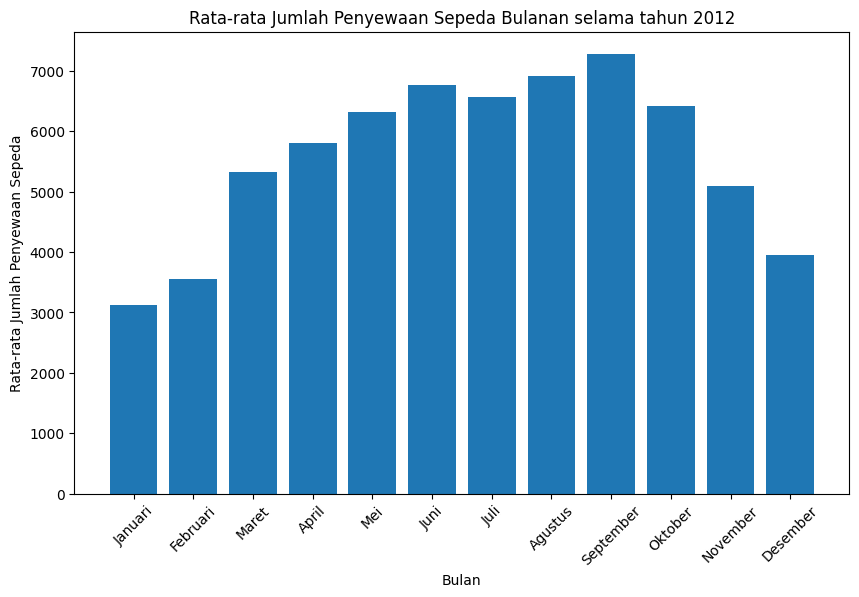

In [277]:
Bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
plt.figure(figsize=(10, 6))
plt.bar(Bulan, monthly_avg_cnt.values)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Bulanan selama tahun 2012')
plt.show()


## **Insight**
Berdasarkan data barchart yang menampilkan rata-rata jumlah pelanggan dari kolom 'cnt', pada satu tahun terakhir, diperoleh jumlah total pelanggan meningkat di bulan Januari-september dan mulai turun pada September-Desember.

### Pertanyaan 2: Kapan performa penjualan meningkat dan menurun?

In [217]:
#Membuat data rata-rata jumlah pelanggan pada kolom 'cnt' setiap bulan di tahun 2011
First_year_data = day_df[day_df['dteday'] <= day_df['dteday'].min() + pd.DateOffset(years=1)]
First_year_data['month'] = First_year_data['dteday'].dt.month

monthlyfirst_avg_cnt = First_year_data.groupby('month')['cnt'].mean()

print(monthlyfirst_avg_cnt)

month
1     1265.093750
2     1721.964286
3     2065.967742
4     3162.333333
5     4381.322581
6     4783.733333
7     4559.387097
8     4409.387097
9     4247.266667
10    3984.225806
11    3405.566667
12    2816.870968
Name: cnt, dtype: float64


<ipython-input-217-519dd13203f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  First_year_data['month'] = First_year_data['dteday'].dt.month


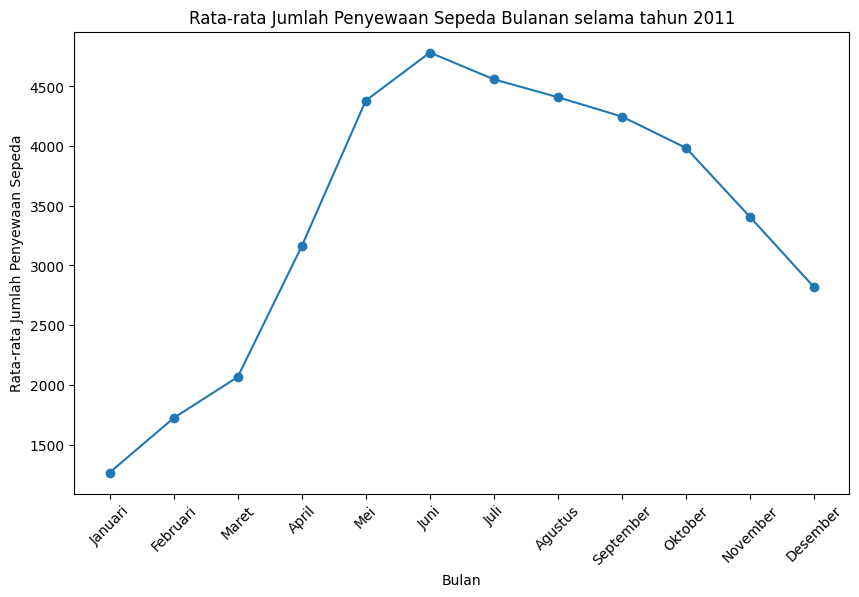

In [218]:
#Menampilkan barchart rata-rata jumlah pelanggan setiap bulan pada tahun 2011
Bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
plt.figure(figsize=(10, 6))
plt.plot(Bulan, monthlyfirst_avg_cnt.values)
plt.scatter(Bulan, monthlyfirst_avg_cnt.values)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Bulanan selama tahun 2011')
plt.show()

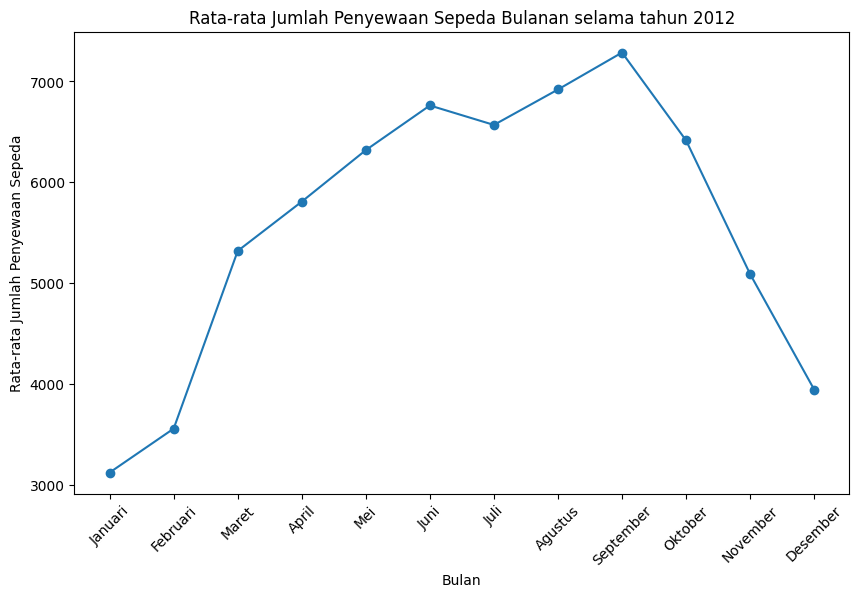

In [219]:
#Menampilkan barchart rata-rata jumlah pelanggan setiap bulan pada tahun 2012
Bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
plt.figure(figsize=(10, 6))
plt.plot(Bulan, monthly_avg_cnt.values)
plt.scatter(Bulan, monthly_avg_cnt.values)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Bulanan selama tahun 2012')
plt.xticks(rotation=45)
plt.show()

### **Insight**
Kedua data diatas, pada tahun 2011 dan 2012 menunjukkan adanya tren kenaikan jumlah pelanggan pada bulan Januari-April dan penurunan jumlah pembeli dari "cnt". Hal ini bisa jadi dikarenakan ada faktor-faktor yang mempengaruhi kenaikan dan penurunan pembeli pada bulan-bulan tertentu.

### Pertanyaan 3: Faktor apa saja yang mempengaruhi performa dari penyewaan?

Untuk mencari tahu faktor yang mempengaruhi, maka dapat melihat variabel-variabel lain yang mempengaruhi jumlah total pelanggan seperti temperatur, workingday, temperatur, dan lain-lain.

In [220]:
#Mencari faktor temperatur pada jumlah pelanggan
temp_cnt_df = First_year_data[['temp', 'cnt']]
temp_cnt_grouped = temp_cnt_df.groupby('temp')['cnt'].sum()

temp_cnt_grouped

,cnt
temp,
0.059130,981
0.096522,986
0.097391,1416
0.134783,1605
0.138333,822
...,...
0.815000,3784
0.830000,3606
0.838333,3846


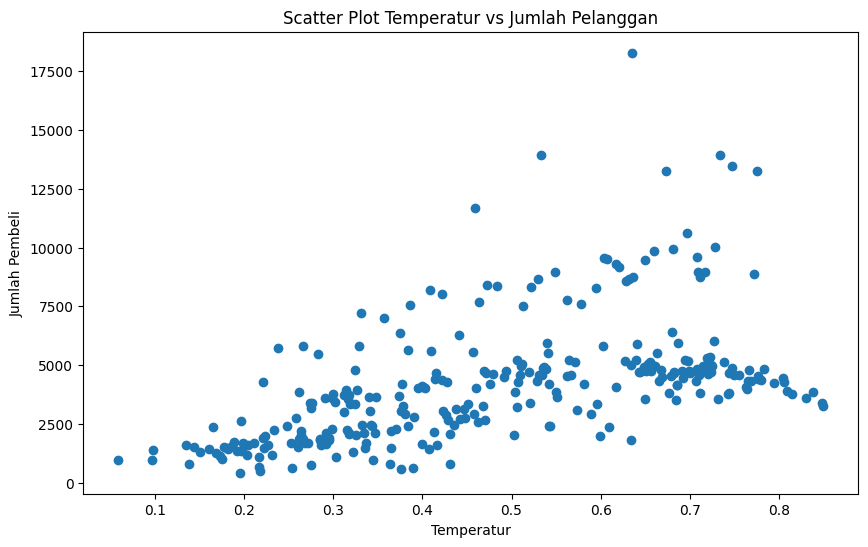

In [245]:
#Data Scatter plot vs Jumlah Pelanggan/Pembeli
plt.figure(figsize=(10, 6))
plt.scatter(temp_cnt_grouped.index, temp_cnt_grouped.values)
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Pembeli')
plt.title('Scatter Plot Temperatur vs Jumlah Pelanggan')
plt.show()

In [222]:

time_tempfirst_df = First_year_data[['dteday', 'temp']]
print(time_tempfirst_df)

        dteday      temp
0   2011-01-01  0.344167
1   2011-01-02  0.363478
2   2011-01-03  0.196364
3   2011-01-04  0.200000
4   2011-01-05  0.226957
..         ...       ...
361 2011-12-28  0.299130
362 2011-12-29  0.248333
363 2011-12-30  0.311667
364 2011-12-31  0.410000
365 2012-01-01  0.370000

[366 rows x 2 columns]


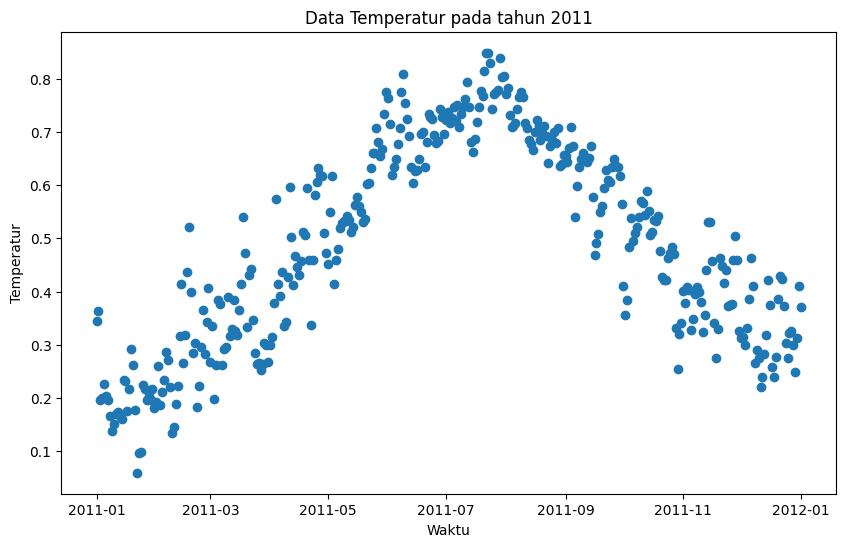

In [246]:
# Data Temperatur pada tahun 2011 timeseries
plt.figure(figsize=(10, 6))
plt.scatter(time_tempfirst_df['dteday'], time_tempfirst_df['temp'])
plt.xlabel('Waktu')
plt.ylabel('Temperatur')
plt.title('Data Temperatur pada tahun 2011')
plt.show()

In [253]:
time_templast_df = last_year_data[['dteday', 'temp']]
print(time_templast_df)

        dteday      temp
364 2011-12-31  0.410000
365 2012-01-01  0.370000
366 2012-01-02  0.273043
367 2012-01-03  0.150000
368 2012-01-04  0.107500
..         ...       ...
726 2012-12-27  0.254167
727 2012-12-28  0.253333
728 2012-12-29  0.253333
729 2012-12-30  0.255833
730 2012-12-31  0.215833

[367 rows x 2 columns]


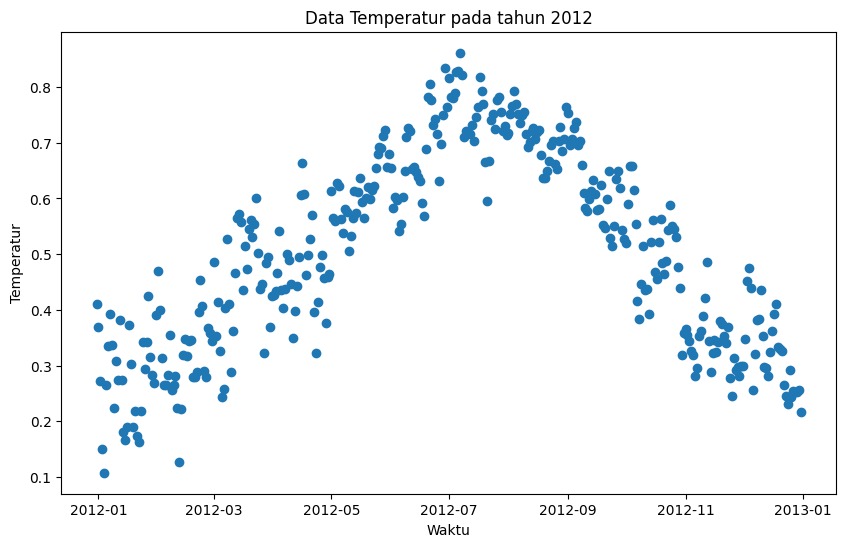

In [254]:
#Data Temperatur pada tahun 2012
plt.figure(figsize=(10, 6))
plt.scatter(time_templast_df['dteday'], time_templast_df['temp'])
plt.xlabel('Waktu')
plt.ylabel('Temperatur')
plt.title('Data Temperatur pada tahun 2012')
plt.show()

In [249]:

time_humfirst_df = last_year_data[['dteday', 'hum']]
print(time_humfirst_df)
time_humlast_df = last_year_data[['dteday', 'hum']]
print(time_humlast_df)

        dteday       hum
364 2011-12-31  0.615833
365 2012-01-01  0.692500
366 2012-01-02  0.381304
367 2012-01-03  0.441250
368 2012-01-04  0.414583
..         ...       ...
726 2012-12-27  0.652917
727 2012-12-28  0.590000
728 2012-12-29  0.752917
729 2012-12-30  0.483333
730 2012-12-31  0.577500

[367 rows x 2 columns]
        dteday       hum
364 2011-12-31  0.615833
365 2012-01-01  0.692500
366 2012-01-02  0.381304
367 2012-01-03  0.441250
368 2012-01-04  0.414583
..         ...       ...
726 2012-12-27  0.652917
727 2012-12-28  0.590000
728 2012-12-29  0.752917
729 2012-12-30  0.483333
730 2012-12-31  0.577500

[367 rows x 2 columns]


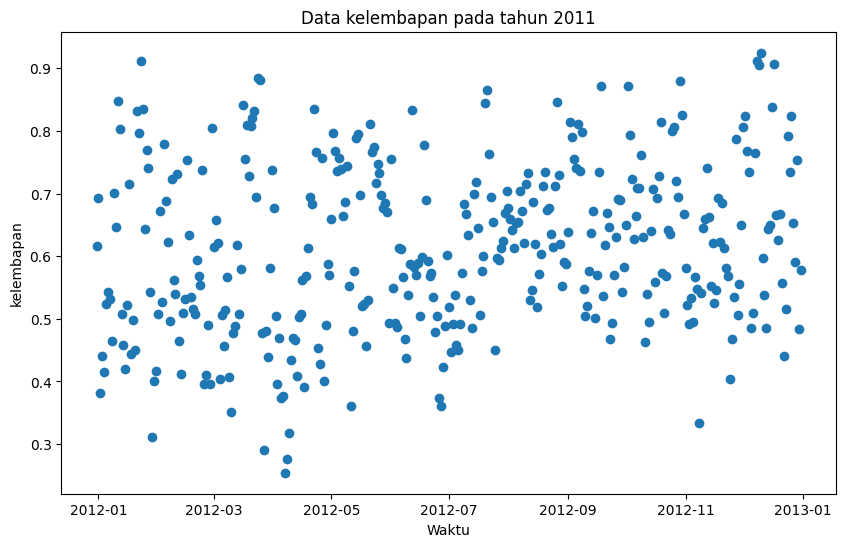

In [250]:
#Data kelembapan pada tahun 2011
plt.figure(figsize=(10, 6))
plt.scatter(time_humfirst_df['dteday'], time_humfirst_df['hum'])
plt.xlabel('Waktu')
plt.ylabel('kelembapan')
plt.title('Data kelembapan pada tahun 2011')
plt.show()

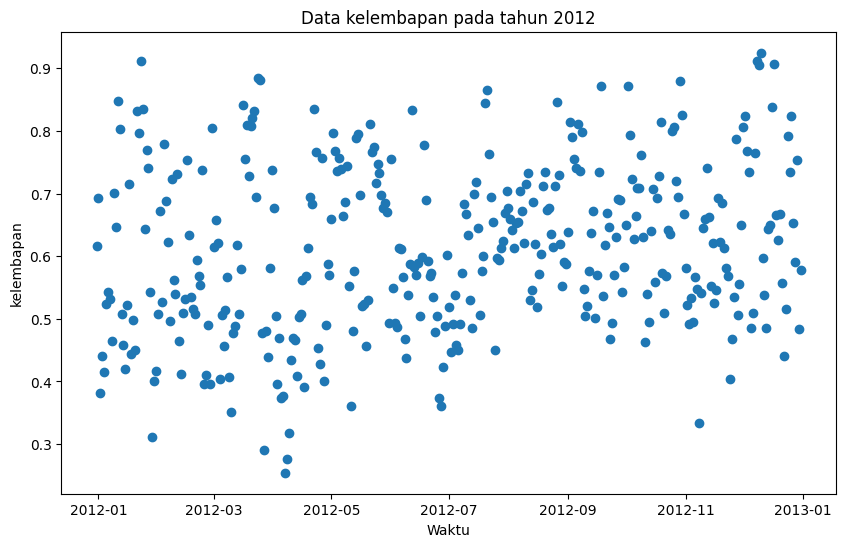

In [251]:
#Data kelembapan pada tahun 2012
plt.figure(figsize=(10, 6))
plt.scatter(time_humlast_df['dteday'], time_humlast_df['hum'])
plt.xlabel('Waktu')
plt.ylabel('kelembapan')
plt.title('Data kelembapan pada tahun 2012')
plt.show()

In [252]:
time_windspeedfirst_df = last_year_data[['dteday', 'windspeed']]
print(time_windspeedfirst_df)
time_windspeedlast_df = last_year_data[['dteday', 'windspeed']]
print(time_windspeedlast_df)

        dteday  windspeed
364 2011-12-31   0.220154
365 2012-01-01   0.192167
366 2012-01-02   0.329665
367 2012-01-03   0.365671
368 2012-01-04   0.184700
..         ...        ...
726 2012-12-27   0.350133
727 2012-12-28   0.155471
728 2012-12-29   0.124383
729 2012-12-30   0.350754
730 2012-12-31   0.154846

[367 rows x 2 columns]
        dteday  windspeed
364 2011-12-31   0.220154
365 2012-01-01   0.192167
366 2012-01-02   0.329665
367 2012-01-03   0.365671
368 2012-01-04   0.184700
..         ...        ...
726 2012-12-27   0.350133
727 2012-12-28   0.155471
728 2012-12-29   0.124383
729 2012-12-30   0.350754
730 2012-12-31   0.154846

[367 rows x 2 columns]


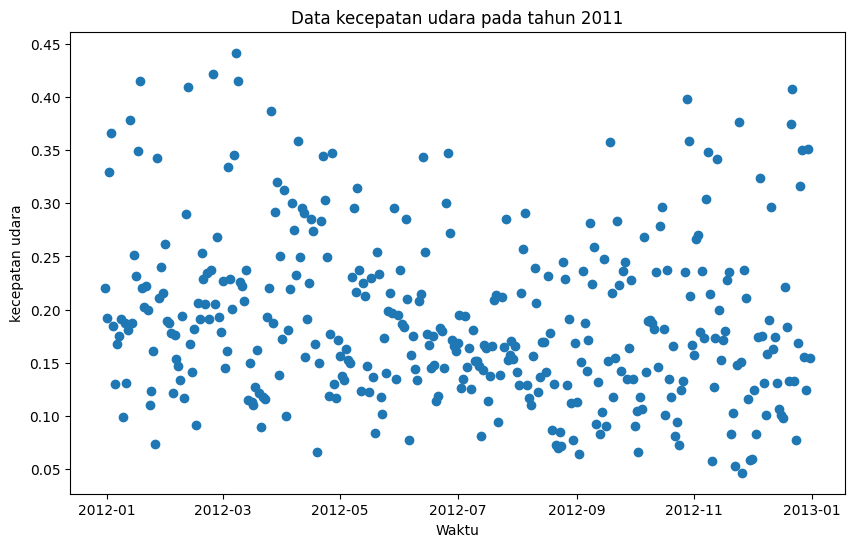

In [230]:
plt.figure(figsize=(10, 6))
plt.scatter(time_windspeedfirst_df['dteday'], time_windspeedfirst_df['windspeed'])
plt.xlabel('Waktu')
plt.ylabel('kecepatan udara')
plt.title('Data kecepatan udara pada tahun 2011')
plt.show()

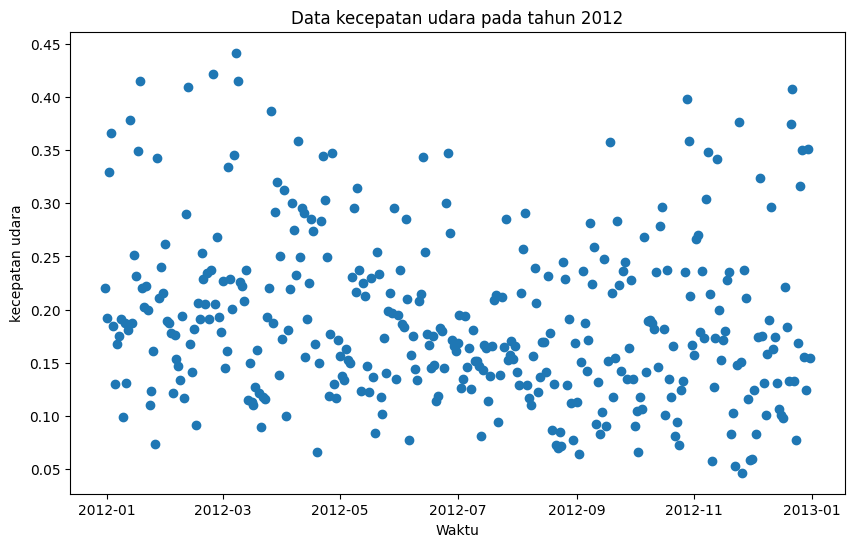

In [231]:
plt.figure(figsize=(10, 6))
plt.scatter(time_windspeedlast_df['dteday'], time_windspeedlast_df['windspeed'])
plt.xlabel('Waktu')
plt.ylabel('kecepatan udara')
plt.title('Data kecepatan udara pada tahun 2012')
plt.show()

In [256]:
avg_cnt_by_weather = First_year_data.groupby('weathersit')['cnt'].mean()

print(avg_cnt_by_weather)

avg_cnt_by_weatherlast = last_year_data.groupby('weathersit')['cnt'].mean()

print(avg_cnt_by_weatherlast)

weathersit
1    3688.814978
2    3088.096774
3    1674.133333
Name: cnt, dtype: float64
weathersit
1    5988.949580
2    4991.333333
3    2126.166667
Name: cnt, dtype: float64


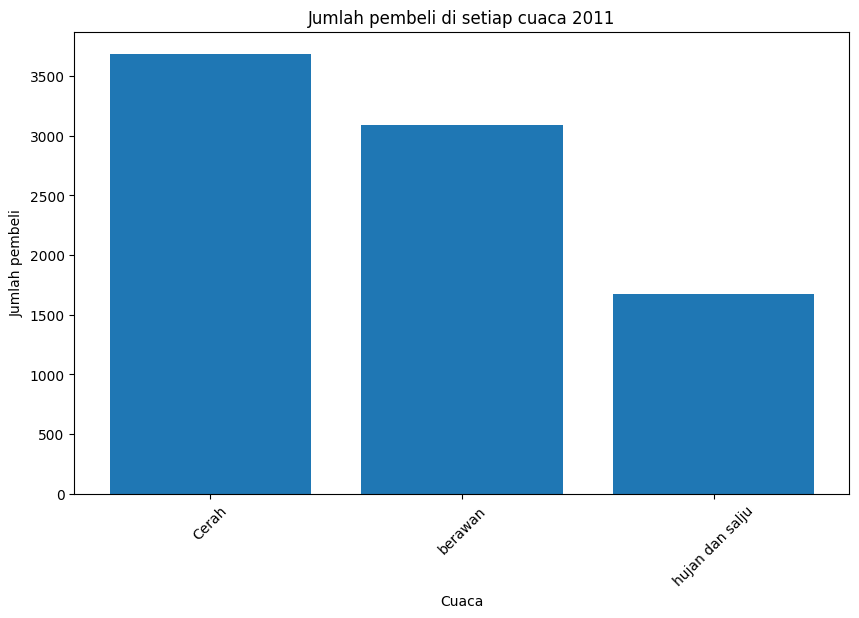

In [263]:
Cuaca = ['Cerah','berawan','hujan dan salju']
plt.figure(figsize=(10, 6))
plt.bar(Cuaca, avg_cnt_by_weather.values)
plt.xlabel('Cuaca')
plt.ylabel('Jumlah pembeli')
plt.title('Jumlah pembeli di setiap cuaca 2011')
plt.xticks(rotation=45)
plt.show()

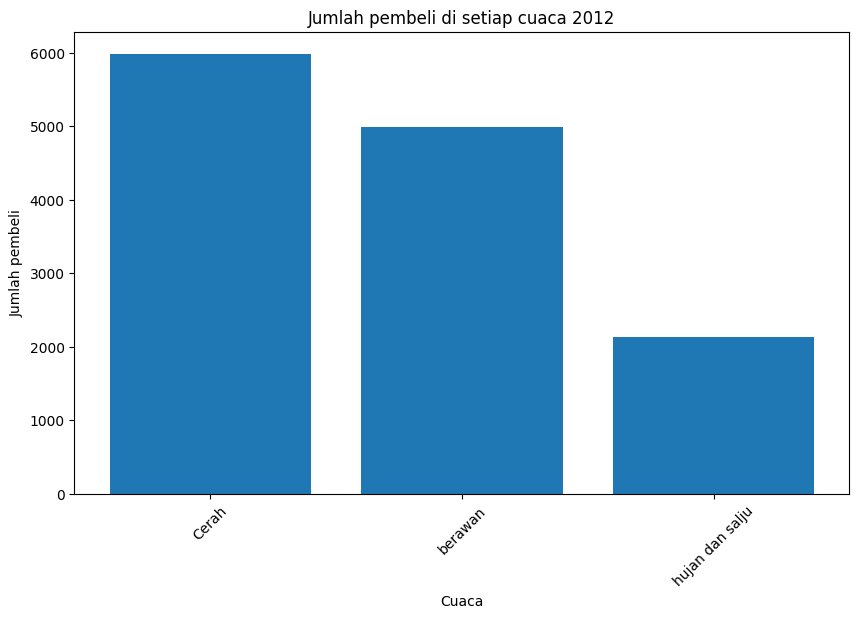

In [264]:
Cuaca =['Cerah','berawan','hujan dan salju']
plt.figure(figsize=(10, 6))
plt.bar(Cuaca, avg_cnt_by_weatherlast.values)
plt.xlabel('Cuaca')
plt.ylabel('Jumlah pembeli')
plt.title('Jumlah pembeli di setiap cuaca 2012')
plt.xticks(rotation=45)
plt.show()

In [243]:

time_seasonfirst_df = First_year_data[['dteday', 'season']]
print(time_seasonfirst_df)


time_seasonlast_df = last_year_data[['dteday', 'season']]
print(time_seasonlast_df)

        dteday  season
0   2011-01-01       1
1   2011-01-02       1
2   2011-01-03       1
3   2011-01-04       1
4   2011-01-05       1
..         ...     ...
361 2011-12-28       1
362 2011-12-29       1
363 2011-12-30       1
364 2011-12-31       1
365 2012-01-01       1

[366 rows x 2 columns]
        dteday  season
364 2011-12-31       1
365 2012-01-01       1
366 2012-01-02       1
367 2012-01-03       1
368 2012-01-04       1
..         ...     ...
726 2012-12-27       1
727 2012-12-28       1
728 2012-12-29       1
729 2012-12-30       1
730 2012-12-31       1

[367 rows x 2 columns]


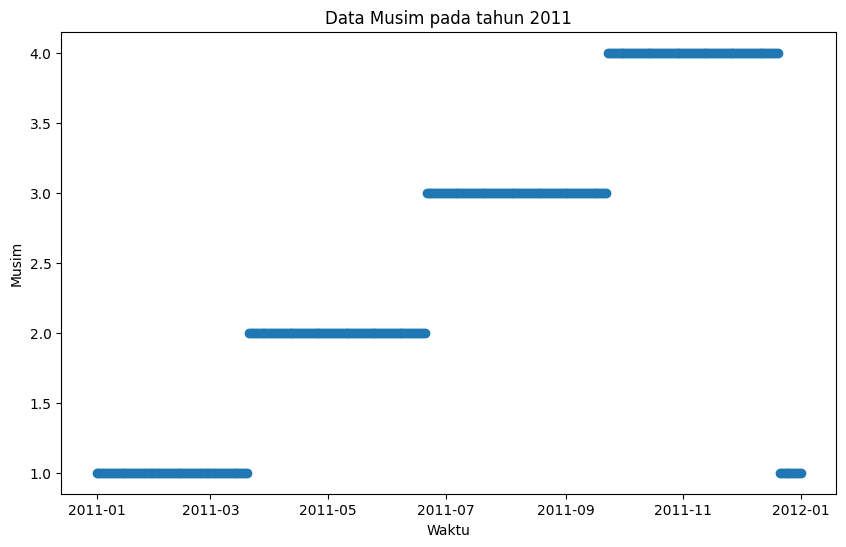

In [239]:
plt.figure(figsize=(10, 6))
plt.scatter(time_seasonfirst_df['dteday'], time_seasonfirst_df['season'])
plt.xlabel('Waktu')
plt.ylabel('Musim')
plt.title('Data Musim pada tahun 2011')
plt.show()


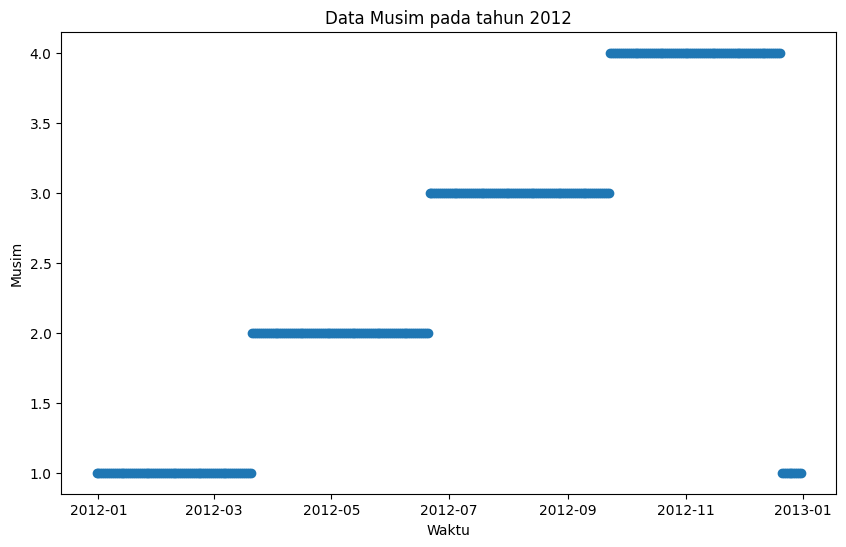

In [276]:
plt.figure(figsize=(10, 6))
plt.scatter(time_seasonlast_df['dteday'], time_seasonlast_df['season'])
plt.xlabel('Waktu')
plt.ylabel('Musim')
plt.title('Data Musim pada tahun 2012')
plt.show()


In [271]:
avg_cnt_by_seasonfirst = First_year_data.groupby('season')['cnt'].mean()

print(avg_cnt_by_seasonfirst)

avg_cnt_by_seasonlast= last_year_data.groupby('season')['cnt'].mean()

print(avg_cnt_by_seasonlast)

season
1    1673.560440
2    3775.173913
3    4464.361702
4    3664.460674
Name: cnt, dtype: float64
season
1    3519.923913
2    6209.489130
3    6824.244681
4    5791.865169
Name: cnt, dtype: float64


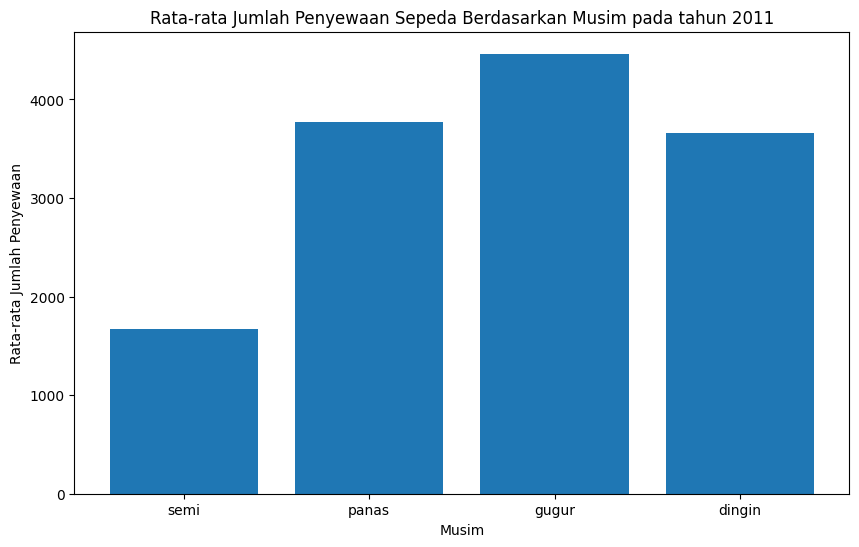

In [272]:

Musim = ['semi', 'panas', 'gugur', 'dingin']
plt.figure(figsize=(10, 6))
plt.bar(Musim, avg_cnt_by_seasonfirst.values)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim pada tahun 2011')
plt.show()


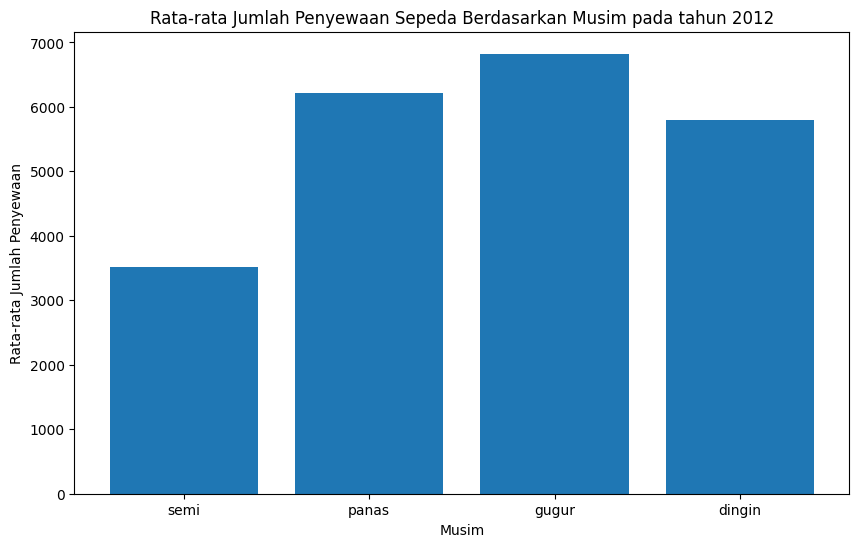

In [273]:

Musim = ['semi', 'panas', 'gugur', 'dingin']
plt.figure(figsize=(10, 6))
plt.bar(Musim, avg_cnt_by_seasonlast.values)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim pada tahun 2012')
plt.show()


## **Insight:**
- Berdasarkan data yang disajikan, kenaikan jumlah pada saat temperatur naik. Temperatur ini naik dengan puncak pada saat bulan juli di tahun 2011 dan 2012.
- Selain itu musim gugur juga berpengaruh terhadap jumlah pembeli. Berdasarkan data yang disajikan, musim gugur terjadi pada bulan juli. Hal ini sesuai dengan data sebelumnya yang menunjukkan bahwa bulan juli merupakan puncak jumlah pelanggan.
- Variabel lain seperti kecepatan udara dan kelembapan tidak berpengaruh terhadap jumlah pelanggan. Hal ini ditunjukkan dengan nilai variabel yang bergerak acak terhadap waktu.

# Conclusion

- Selama setahun terakhir, berdasarkan data barchart yang menampilkan rata-rata jumlah pelanggan dari kolom 'cnt', pada satu tahun terakhir, diperoleh jumlah total pelanggan meningkat di bulan Januari-september dan mulai turun pada September-Desember.
- Berdasarkan analisis visualisasi data pada pertanyaan dua, Data Cenderung naik dari setiap Januari-Juli dan cenderung turun September-Desember.
- Faktor-faktor yang mempengaruhi penjualan sepeda adalah temperatur. Semakin besar nilai temperatur, semakin banyak pula peminat orang-orang untuk bersepeda sehingga penjualan meningkat. Temperatur hangat ini puncaknya terjadi pada bulan Juli yang sesuai dengan data yang ada. Pada bulan ini pula terjadi musim gugur yang merupakan puncak jumlah pelanggan ada.

# Suggestion

- Perusahaan bisa memberikan diskon terhadap pembelian sepeda pada musim semi untuk meningkatkan penjualan. Hal ini karena tidak mungkin orang-orang untuk bersepeda pada musim dingin yang merupakan jumlah pelanggan terendah. Hal ini karena pada saat itu orang-orang cenderung menghindari aktivitas outdoor.